# Grid Search Cv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [11]:
dataset=pd.read_csv("lung_cancer_data.csv")

In [12]:
dataset.head(4)

,Age,Smoking_Years,Lung_Cancer
0,71,0,0
1,34,37,0
2,80,12,0
3,40,10,0


In [13]:
x=dataset.iloc[:,:-1]
y=dataset["Lung_Cancer"]

<Axes: xlabel='Age', ylabel='Smoking_Years'>

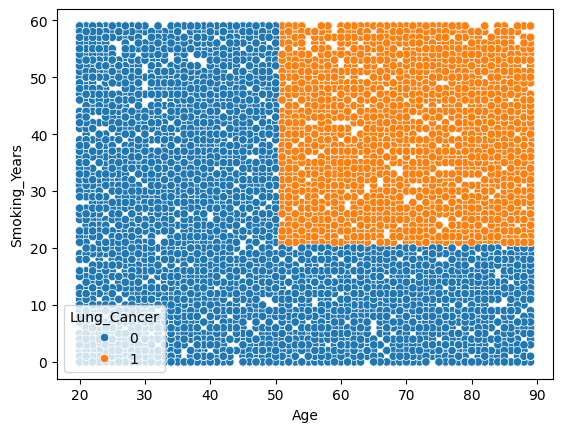

In [14]:
sns.scatterplot(x="Age",y="Smoking_Years",hue="Lung_Cancer",data=dataset)

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt=DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=2,min_samples_split=2,splitter='best',ccp_alpha=0)

In [42]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=2)

In [43]:
dt.score(x_test,y_test),dt.score(x_test,y_test)

(1.0, 1.0)

In [44]:
df = {
    "criterion": ['gini', 'entropy', 'log_loss'],  # Measure of quality of a split
    "splitter": ['best', 'random'],  # Strategy used to split at each node
    "max_depth": [i for i in range(2, 20)],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split an internal node
    "ccp_alpha": [0.0, 0.01, 0.1],  # Complexity parameter used for Minimal Cost-Complexity Pruning
    "class_weight": [None, 'balanced']  # Weights associated with classes
}

In [45]:
gc=GridSearchCV(DecisionTreeClassifier(),param_grid=df)

In [46]:
gc.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [47]:
gc.best_params_

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [48]:
gc.score(x_test,y_test)

1.0